In [1]:
import spacy.cli
spacy.cli.download('en_core_web_lg')

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /explosion/spacy-models/master/compatibility.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000247E3A07290>: Failed to resolve 'raw.githubusercontent.com' ([Errno 11001] getaddrinfo failed)"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
dataset = pd.read_csv('Downloads/fake_or_real_news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
dataset.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
dataset.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

<Axes: xlabel='count', ylabel='label'>

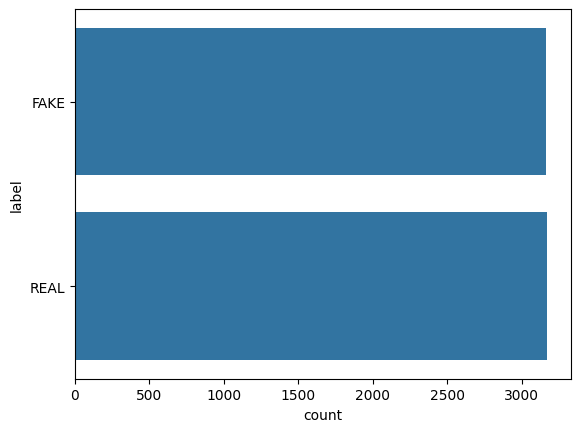

In [6]:
sns.countplot(dataset['label'])

In [7]:
data = dataset['title'][1]
data

'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'

In [8]:
import re

# data = "Example data with numbers 123 and symbols !@#"
data = re.sub('[^a-zA-Z]', ' ', data)

print(data)


Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally  VIDEO 


In [9]:
data = data.lower()
data

'watch the exact moment paul ryan committed political suicide at a trump rally  video '

In [10]:
list = data.split()
list

['watch',
 'the',
 'exact',
 'moment',
 'paul',
 'ryan',
 'committed',
 'political',
 'suicide',
 'at',
 'a',
 'trump',
 'rally',
 'video']

In [11]:
import nltk

In [12]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

review = [stemmer.stem(word) for word in list if word not in set(stopwords.words('english'))]
print(review)

['watch', 'exact', 'moment', 'paul', 'ryan', 'commit', 'polit', 'suicid', 'trump', 'ralli', 'video']


In [14]:
' '.join(review)

'watch exact moment paul ryan commit polit suicid trump ralli video'

In [15]:
corpus = []

for i in range(0 ,len(dataset)):
    review = re.sub('[^a-z A-Z]' , ' ' , dataset['title'][i])
    review = review.lower()
    list = review.split()
    review = [stemmer.stem(word) for word in list if not word  in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

In [16]:
corpus[1]

'watch exact moment paul ryan commit polit suicid trump ralli video'

In [17]:
#corpus

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()


In [19]:
X.shape

(6335, 6884)

In [20]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y = dataset['label']

In [22]:
y.shape

(6335,)

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.25 , random_state = 0)

In [24]:
X_train.shape

(4751, 6884)

In [25]:
X_test.shape

(1584, 6884)

In [26]:
from sklearn.naive_bayes import MultinomialNB
cl =  MultinomialNB()
cl.fit(X_train , y_train)

MultinomialNB()

In [27]:
y_pred = cl.predict(X_test)
y_pred

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

array([[586, 181],
       [126, 691]], dtype=int64)

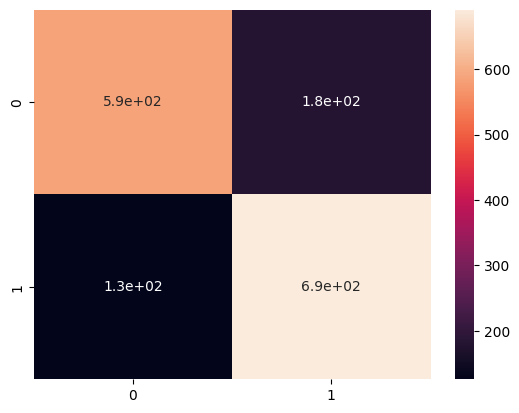

In [28]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot =True)
cm

In [29]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 80.61868686868688
